Testing
https://pytorch.org/audio/main/tutorials/audio_data_augmentation_tutorial.html

In [10]:
import torch
import torchaudio
import torchaudio.functional as F

import math

from IPython.display import Audio
import matplotlib.pyplot as plt
import os
from torchaudio.utils import download_asset

print(torch.__version__)
print(torchaudio.__version__)

2.0.1+cu117
2.0.2+cu117


In [11]:
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)
    plt.show(block=False)

In [12]:
def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
    waveform = waveform.numpy()

    num_channels, _ = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)
    plt.show(block=False)

In [13]:
speech_fpath = "audio/speech/"
speech_clips = os.listdir(speech_fpath)
noise_fpath = "audio/noise/"
noise_clips = os.listdir(noise_fpath)
print("No. of .wav files in speech folder = ",len(speech_clips))
print("No. of .wav files in noise folder = ",len(noise_clips))

No. of .wav files in speech folder =  10
No. of .wav files in noise folder =  10


In [14]:
waveform1, sample_rate1 = torchaudio.load(speech_fpath + speech_clips[0])
waveform2, sample_rate2 = torchaudio.load(noise_fpath + noise_clips[0])

In [15]:
speech, _ = torchaudio.load(speech_fpath + speech_clips[0])
noise, _ = torchaudio.load(noise_fpath + noise_clips[0])
noise = noise[:, : speech.shape[1]]

snr_dbs = torch.tensor([-3, -6, -9])
noisy_speeches = F.add_noise(speech, noise, snr_dbs)

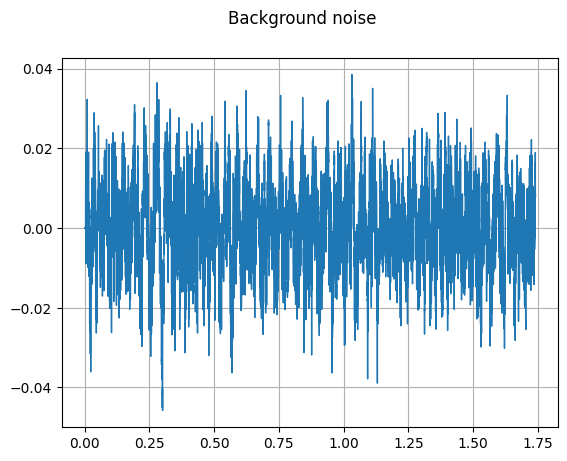

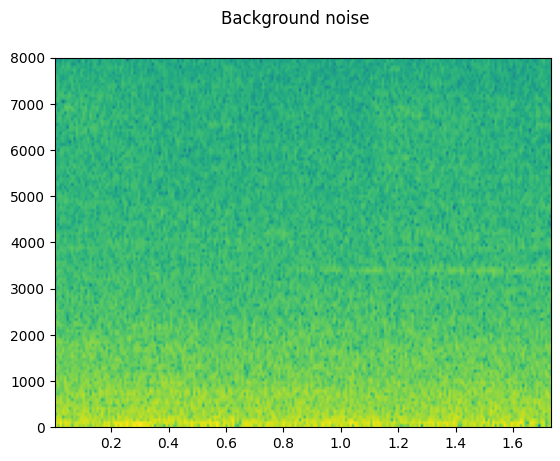

In [16]:
plot_waveform(noise, sample_rate1, title="Background noise")
plot_specgram(noise, sample_rate1, title="Background noise")
Audio(noise, rate=sample_rate1)

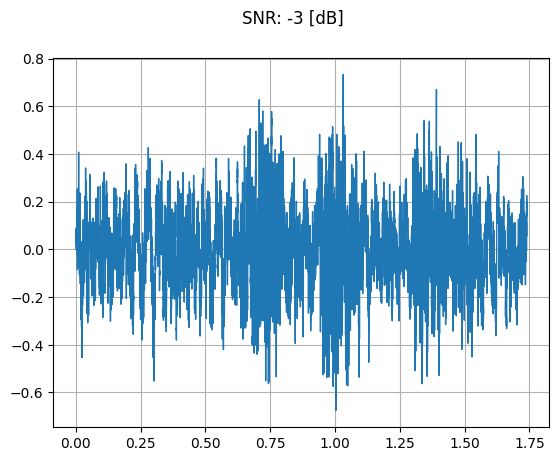

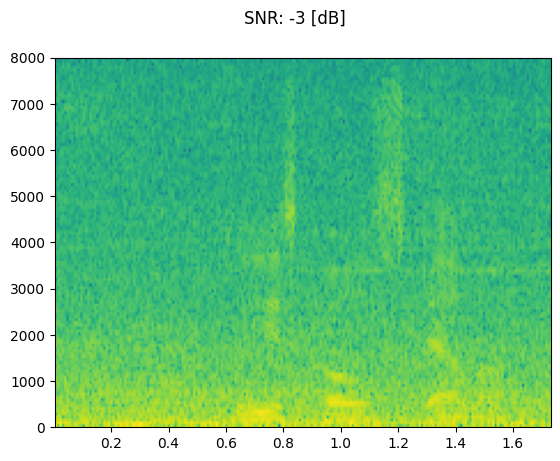

In [17]:
snr_db, noisy_speech = snr_dbs[0], noisy_speeches[0:1]
plot_waveform(noisy_speech, sample_rate1, title=f"SNR: {snr_db} [dB]")
plot_specgram(noisy_speech, sample_rate1, title=f"SNR: {snr_db} [dB]")
Audio(noisy_speech, rate=sample_rate1)

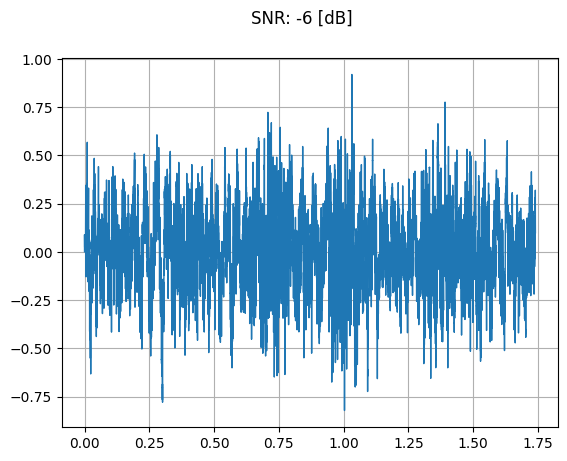

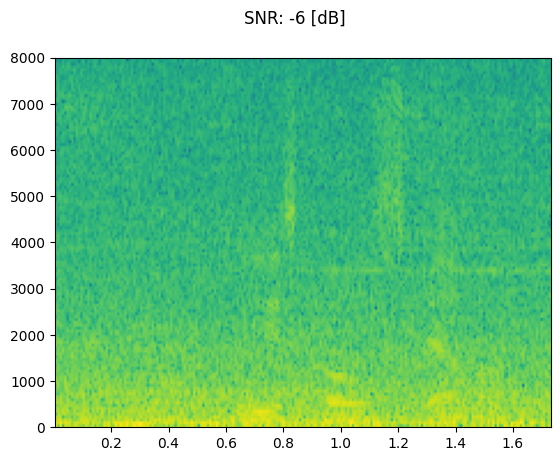

In [18]:
snr_db, noisy_speech = snr_dbs[1], noisy_speeches[1:2]
plot_waveform(noisy_speech, sample_rate1, title=f"SNR: {snr_db} [dB]")
plot_specgram(noisy_speech, sample_rate1, title=f"SNR: {snr_db} [dB]")
Audio(noisy_speech, rate=sample_rate1)

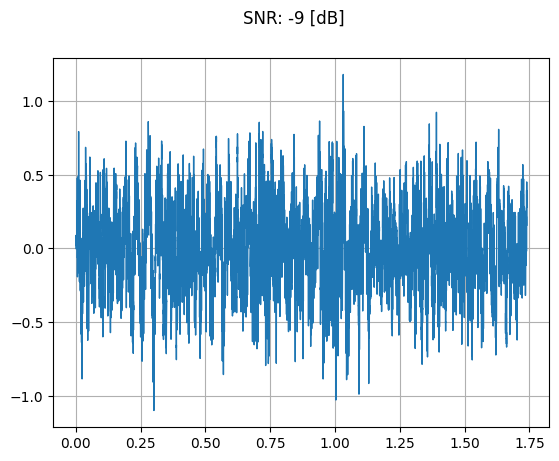

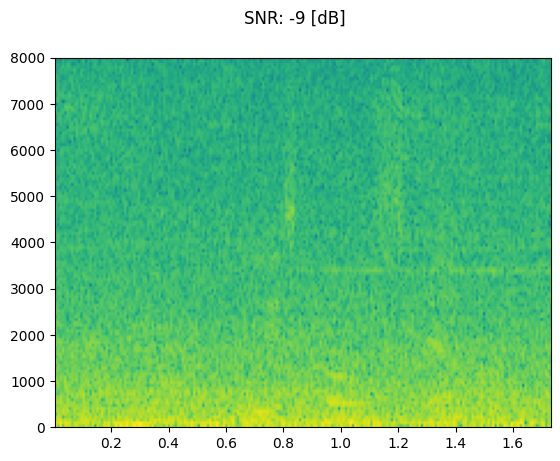

In [19]:
snr_db, noisy_speech = snr_dbs[2], noisy_speeches[2:3]
plot_waveform(noisy_speech, sample_rate1, title=f"SNR: {snr_db} [dB]")
plot_specgram(noisy_speech, sample_rate1, title=f"SNR: {snr_db} [dB]")
Audio(noisy_speech, rate=sample_rate1)

https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html

In [20]:
def inspect_file(path):
  print("-" * 10)
  print("Source:", path)
  print("-" * 10)
  print(f" - File size: {os.path.getsize(path)} bytes")
  print(f" - {torchaudio.info(path)}")

In [21]:
path = "save_test.wav"
torchaudio.save(path, noisy_speech, sample_rate1)
inspect_file(path)

----------
Source: save_example_default.wav
----------
 - File size: 111440 bytes
 - AudioMetaData(sample_rate=16000, num_frames=27840, num_channels=1, bits_per_sample=32, encoding=PCM_F)


In [23]:
speech_fpath = "audio/speech/"
speech_clips = os.listdir(speech_fpath)
noise_fpath = "audio/noise/"
noise_clips = os.listdir(noise_fpath)
print("No. of .wav files in speech folder = ",len(speech_clips))
print("No. of .wav files in noise folder = ",len(noise_clips))

No. of .wav files in speech folder =  10
No. of .wav files in noise folder =  10


In [62]:
#Randomise speech files can not be used twice
import random
speech_ran_list = random.sample(range(len(speech_clips)), len(speech_clips))
print(speech_ran_list)

for i in range(0, len(speech_clips)):
    os.rename(speech_fpath + speech_clips[i], speech_fpath + str(speech_ran_list[i]) + "_speech.wav")


[4, 6, 9, 7, 0, 8, 1, 2, 3, 5]


In [61]:
#Randomise noise files can not be used twice
import random
noise_ran_list = random.sample(range(len(noise_clips)), len(noise_clips))
print(noise_ran_list)

for i in range(0, len(noise_clips)):
    os.rename(noise_fpath + noise_clips[i], noise_fpath + str(noise_ran_list[i]) + "_noise.wav")


[4, 6, 5, 7, 8, 1, 3, 9, 0, 2]


In [63]:
for i in range(0, len(speech_clips)):
  waveform1, sample_rate1 = torchaudio.load(speech_fpath + speech_clips[i])
  waveform2, sample_rate2 = torchaudio.load(noise_fpath + noise_clips[i])

  speech, _ = torchaudio.load(speech_fpath + speech_clips[i])
  noise, _ = torchaudio.load(noise_fpath + noise_clips[i])
  noise = noise[:, : speech.shape[1]]

  snr_dbs = torch.tensor([-3, -6, -9])
  noisy_speeches = F.add_noise(speech, noise, snr_dbs)

  snr_db, noisy_speech = snr_dbs[0], noisy_speeches[0:1]
  torchaudio.save("audio/noisy_speech/" + "SNR_-3dB_" + str(i) + ".wav", noisy_speech, sample_rate1)

  snr_db, noisy_speech = snr_dbs[1], noisy_speeches[1:2]
  torchaudio.save("audio/noisy_speech/" + "SNR_-6dB_" + str(i) + ".wav", noisy_speech, sample_rate1)

  snr_db, noisy_speech = snr_dbs[2], noisy_speeches[2:3]
  torchaudio.save("audio/noisy_speech/" + "SNR_-9dB_" + str(i) + ".wav", noisy_speech, sample_rate1)

LibsndfileError: Error opening 'audio/speech/speech-001.wav': System error.